#Stock Price Prediction And Forecasting Using Stacked LSTM- Deep Learning

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
df = pd.read_csv("/content/E2E-data-engineering-project/Dataset .csv")

In [17]:
df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013


Target variable is close

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104224 entries, 0 to 104223
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      104224 non-null  object 
 1   Date       104224 non-null  object 
 2   Open       104224 non-null  float64
 3   High       104224 non-null  float64
 4   Low        104224 non-null  float64
 5   Close      104224 non-null  float64
 6   Adj Close  104224 non-null  float64
 7   Volume     104224 non-null  float64
 8   CloseUSD   104224 non-null  float64
dtypes: float64(7), object(2)
memory usage: 7.2+ MB


In [19]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,CloseUSD
count,104224.000000,104224.000000,104224.000000,104224.000000,104224.000000,1.042240e+05,104224.000000
mean,8015.353334,8063.324234,7962.581120,8014.366642,8014.161269,1.347646e+09,3046.729177
std,9140.563404,9196.575802,9082.767802,9140.609758,9140.720456,4.427662e+09,3747.865623
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00,10.204900
25%,2046.887756,2057.213990,2037.185943,2047.506470,2047.358490,0.000000e+00,320.460898
50%,5772.140137,5812.764892,5725.199951,5773.710205,5773.710205,9.529000e+05,1371.598486
75%,10487.377445,10552.179690,10416.092287,10488.622560,10488.622560,2.064676e+08,4383.045241
max,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,9.440374e+10,18934.376173


In [20]:
df.shape

(104224, 9)

In [21]:
filtered_data = df[df['Date'] >= '2019-01-01']
filtered_data.reset_index(drop=True, inplace=True)
print(filtered_data)

        Index        Date         Open         High          Low        Close  \
0         HSI  2019-01-02  25824.43945  25824.43945  25055.26953  25130.34961   
1         HSI  2019-01-03  25077.67969  25262.21094  24896.86914  25064.35938   
2         HSI  2019-01-04  24946.11914  25626.02930  24924.73047  25626.02930   
3         HSI  2019-01-07  26015.83984  26043.64063  25753.46094  25835.69922   
4         HSI  2019-01-08  25852.50000  25960.89063  25688.50000  25875.44922   
...       ...         ...          ...          ...          ...          ...   
7753  J203.JO  2021-05-25  66054.92188  66812.45313  66022.97656  66076.67969   
7754  J203.JO  2021-05-26  66076.67969  66446.36719  66030.35156  66108.22656   
7755  J203.JO  2021-05-27  66108.22656  66940.25000  66102.54688  66940.25000   
7756  J203.JO  2021-05-28  66940.25000  67726.56250  66794.60938  67554.85938   
7757  J203.JO  2021-05-31  67554.85938  68140.85156  67554.85938  67964.03906   

        Adj Close        Vo

In [22]:
df2 = filtered_data

In [23]:
df2.shape


(7758, 9)

In [24]:
df= df2.reset_index()['CloseUSD']

In [25]:
df.head(5)

0    3266.945449
1    3258.366719
2    3331.383809
3    3358.640899
4    3363.808399
Name: CloseUSD, dtype: float64

In [26]:
df.tail(5)

7753    4625.367578
7754    4627.575859
7755    4685.817500
7756    4728.840157
7757    4757.482734
Name: CloseUSD, dtype: float64

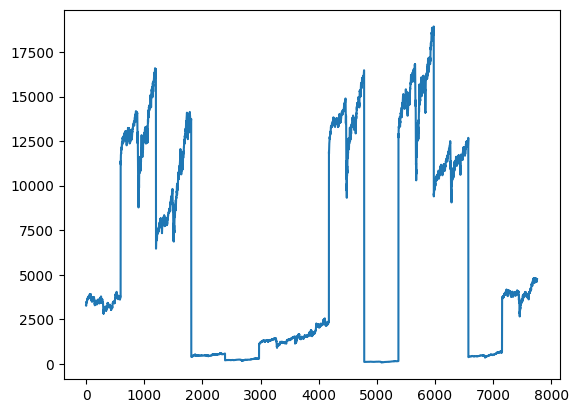

In [27]:
plt.plot(df)

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df= scaler.fit_transform(np.array(df).reshape(-1,1))

In [29]:
train_size = int(len(df)*0.65)
test_size = len(df)- train_size

train_data, test_data = df[0:train_size,:], df[train_size:len(df), :1]

In [30]:
train_size, test_size


(5042, 2716)

In [32]:
train_data.shape, test_data.shape

((5042, 1), (2716, 1))

Time steps and continous data.


In [33]:
import numpy

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [34]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [35]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [37]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
78/78 [==============================] - 27s 271ms/step - loss: 0.0114 - val_loss: 0.0044
Epoch 2/100
78/78 [==============================] - 17s 217ms/step - loss: 0.0027 - val_loss: 0.0029
Epoch 3/100
78/78 [==============================] - 17s 217ms/step - loss: 0.0023 - val_loss: 0.0025
Epoch 4/100
78/78 [==============================] - 17s 222ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 5/100
78/78 [==============================] - 19s 239ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 6/100
78/78 [==============================] - 17s 222ms/step - loss: 0.0015 - val_loss: 0.0064
Epoch 7/100
78/78 [==============================] - 20s 255ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 8/100
78/78 [==============================] - 20s 251ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 9/100
78/78 [==============================] - 18s 232ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 10/100
78/78 [==============================] - 18s 228ms/step - loss: 0.001

In [40]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

82/82 [==============================] - 4s 52ms/step


In [41]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [42]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))
math.sqrt(mean_squared_error(ytest,test_predict))

9517.622918006211

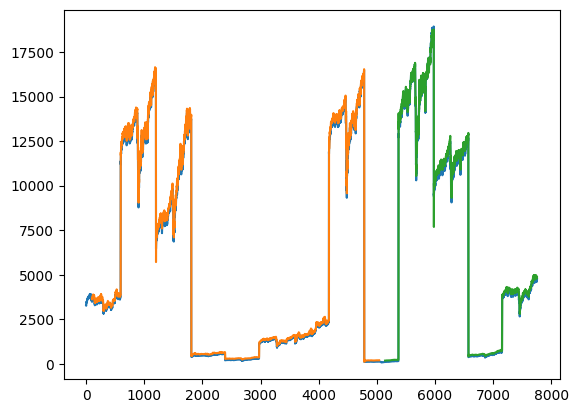

In [43]:
look_back=100
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()